# Key Factors that influence US Home Prices

Aim: To build a model using publically available data for key supply –demand factors that could influence U.S. Home Prices. Use that factors to explain how these factors home prices over last 20 years.

1 Observation date :
These are the dates of observations (Annual observation from the year 2000 to year 2020)

2 Unemployment RATE :
This features gives the unemployment rate of USA from year 2000 to 2020

3 GDP:
This feature gives the Gross Domestic Product value of USA from year 2000 to 2020

4 PERMIT:
This features gives the values of total housing permits passed in USA over the year 2000 to 2020(UNIT: Thousands of unit)

5 POPTHM :
This feature gives the information about the population growth of USA (UNIT: Thousands)

6 Recession:
    This features represent weather the year was going through Recession or not (0 -> represents no Recession, 1-> represents Recession)

7 House Tax:
This features gives the values of taxes the owner had to pay during the observation date (UNIT: Thousands)

8 TTLCONS
This features gives the values of total construction spending in USA during the observation date (Unit: Millions of Dollars)

9 Life Expectancy : This features gives the value of life Expectancy at birth total for United States (Unit: Years)

10 MORTGAGE_RATE_US:
This features gives the values of mortgage average rate in United States (Unit: Percent)

11 CPI:
The CPI stands for Consumer Price Index it measures change over time in the prices paid by consumers for a representative basket of goods and services.

Home Price Index:
This feature basically serves the purpose of target variable in the dataset.

# Importing necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
plt.rc('figure', figsize=(20,20))
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import StackingRegressor

# Exploratory Data Analysis

In [37]:
data=pd.read_excel(r"Documents\US_Price.xlsx")

In [38]:
data

,DATE,UNRATE,GDP in Billion $,Number of Permits,Population in Thousands,Recession,House Tax Unit $,Total Contruction Cost in Million $,LIFE EXPECTANCY in YEARS,MORTGAGE in Percent,CPI,Inflation in Percent,House Price Index
0,2003-01-01,5.991667,11456.44950,1888.416667,290626.2500,0,611,74291.50000,77.036585,5.826981,184.800000,2.270095,133.731333
1,2004-01-01,5.541667,12217.19575,2057.583333,293262.3333,0,595,82613.08333,77.487805,5.839231,189.541667,2.677237,150.440250
2,2005-01-01,5.083333,13039.19700,2160.083333,295992.9167,0,667,93067.58333,77.487805,5.866731,195.716667,3.392747,171.737000
3,2006-01-01,4.608333,13815.58300,1843.666667,298817.6667,0,649,96773.50000,77.687805,6.413269,203.158333,3.225944,183.447500
4,2007-01-01,4.616667,14474.22700,1391.500000,301696.1667,0,582,95662.75000,77.987805,6.337308,209.582583,2.852672,179.918917
5,2008-01-01,5.800000,14769.86150,895.833333,304543.0833,1,674,89779.25000,78.039024,6.027170,216.255083,3.839100,164.057417
6,2009-01-01,9.283333,14478.06675,582.000000,307240.0833,1,657,75980.58333,78.390244,5.036538,217.057833,-0.355546,148.545083
7,2010-01-01,9.608333,15048.97000,603.666667,309838.8333,0,606,67747.08333,78.541463,4.689808,216.253500,1.640043,144.674500
8,2011-01-01,8.933333,15599.73175,624.000000,312295.2500,0,638,65936.50000,78.641463,4.447885,219.104250,3.156842,139.259500
9,2012-01-01,8.075000,16253.97000,828.500000,314725.4167,0,691,71200.25000,78.741463,3.657500,222.713833,2.069337,140.993833


In [39]:
data.shape

(20, 13)

# Checking Null Values

In [41]:
data.isnull().sum()

DATE                                   0
UNRATE                                 0
GDP in Billion $                       0
Number of Permits                      0
Population in Thousands                0
Recession                              0
House Tax Unit $                       0
Total Contruction Cost in Million $    0
LIFE EXPECTANCY in YEARS               1
MORTGAGE in Percent                    0
CPI                                    0
Inflation in Percent                   0
House Price Index                      0
dtype: int64

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   DATE                                 20 non-null     datetime64[ns]
 1   UNRATE                               20 non-null     float64       
 2   GDP in Billion $                     20 non-null     float64       
 3   Number of Permits                    20 non-null     float64       
 4   Population in Thousands              20 non-null     float64       
 5   Recession                            20 non-null     int64         
 6   House Tax Unit $                     20 non-null     int64         
 7   Total Contruction Cost in Million $  20 non-null     float64       
 8   LIFE EXPECTANCY in YEARS             19 non-null     float64       
 9   MORTGAGE in Percent                  20 non-null     float64       
 10  CPI             

In [43]:
data.describe()

,UNRATE,GDP in Billion $,Number of Permits,Population in Thousands,Recession,House Tax Unit $,Total Contruction Cost in Million $,LIFE EXPECTANCY in YEARS,MORTGAGE in Percent,CPI,Inflation in Percent,House Price Index
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,19.000000,20.000000,20.000000,20.000000,20.000000
mean,6.012083,17183.895637,1309.350000,314817.991670,0.150000,1713.450000,95989.379167,78.112067,4.683755,232.286837,2.477744,180.658671
std,1.893961,3792.298608,478.827900,14027.043646,0.366348,1139.593209,23686.180924,0.741440,1.082717,31.428653,1.765183,41.948315
min,3.641667,11456.449500,582.000000,290626.250000,0.000000,582.000000,65936.500000,76.329268,2.957692,184.800000,-0.355546,133.731333
25%,4.614583,14477.106813,964.958333,303831.354150,0.000000,646.250000,76156.645830,77.587805,3.914471,214.585771,1.582875,149.966458
50%,5.454167,16548.582875,1307.250000,315912.208350,0.000000,1406.500000,93705.333330,78.539024,4.496250,225.031792,2.200102,171.959375
75%,7.537500,19741.266750,1684.541667,327343.375025,0.000000,2704.500000,107764.729200,78.665854,5.830044,253.042479,3.174117,194.168896
max,9.608333,25462.722250,2160.083333,333595.083300,1.000000,3423.000000,154056.333300,78.841463,6.413269,300.802083,8.002800,298.494167


# Treating Missing Values

Median 78.53902439


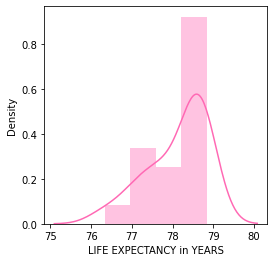

In [44]:
plt.figure(figsize=(4,4))
sns.distplot(data["LIFE EXPECTANCY in YEARS"],color='hotpink')
print("Median",data["LIFE EXPECTANCY in YEARS"].median())

In [45]:
data=data.fillna(data["LIFE EXPECTANCY in YEARS"].median())

In [46]:
data["LIFE EXPECTANCY in YEARS"]

0     77.036585
1     77.487805
2     77.487805
3     77.687805
4     77.987805
5     78.039024
6     78.390244
7     78.541463
8     78.641463
9     78.741463
10    78.741463
11    78.841463
12    78.690244
13    78.539024
14    78.539024
15    78.639024
16    78.787805
17    76.980488
18    76.329268
19    78.539024
Name: LIFE EXPECTANCY in YEARS, dtype: float64

<b>Setting Date as Index as it is unique</b>

In [47]:
data=data.set_index("DATE")

<b>Analyzing how factors changed over Years</b>

In [48]:
years=[2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]

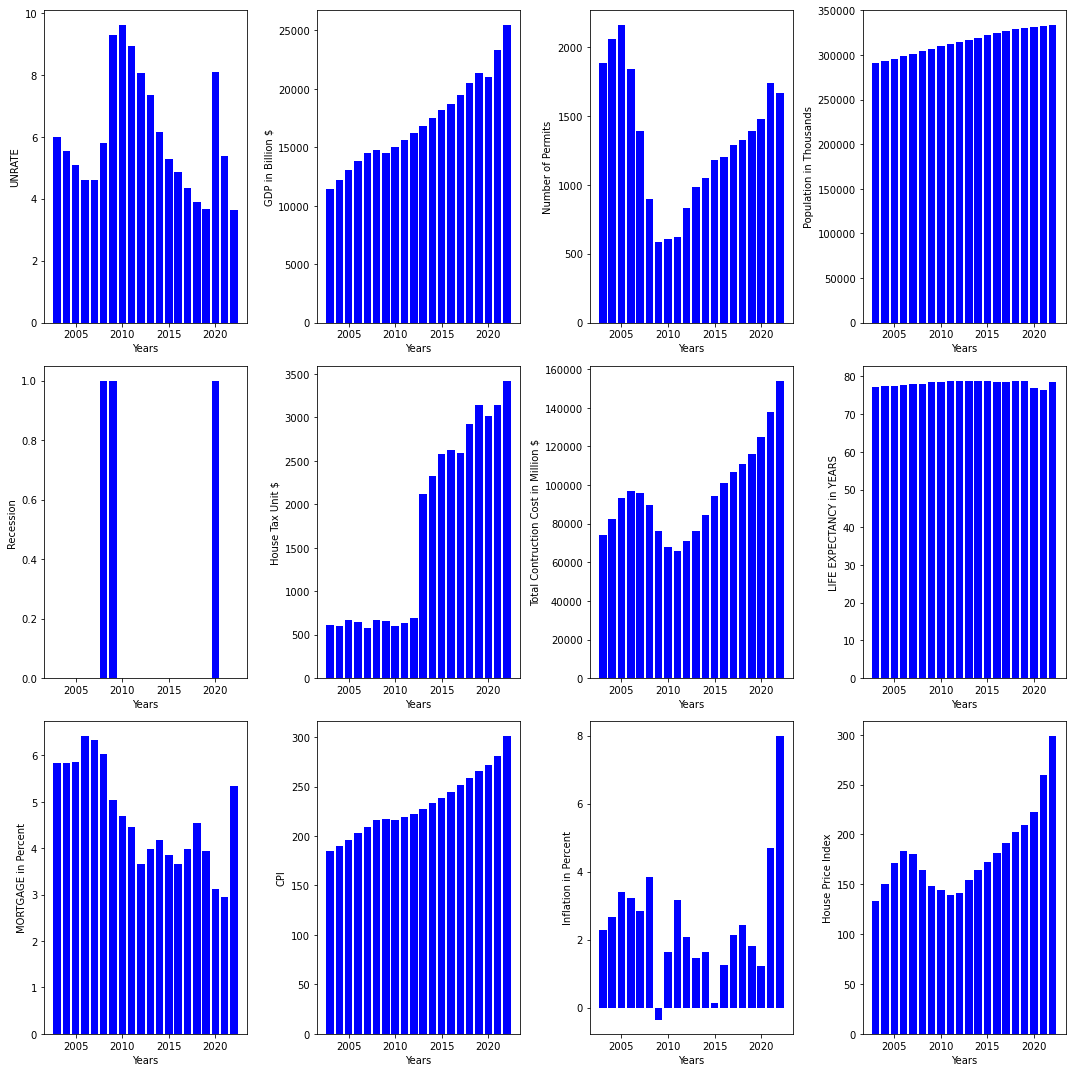

In [49]:
nrows = 3
ncols = 4
repeater = 1
plt.figure(figsize=(15, 15))
plt.xticks(years,rotation=70,fontsize=50)

for i in data.columns:
    plt.subplot(nrows, ncols, repeater)
    plt.bar(years,data.loc[:, i],color='blue')
    plt.xlabel("Years")
    plt.ylabel(str(i))
    repeater = repeater+1
    
plt.tight_layout()
plt.show()

In [50]:
data.columns

Index(['UNRATE', 'GDP in Billion $', 'Number of Permits',
       'Population in Thousands', 'Recession', 'House Tax Unit $',
       'Total Contruction Cost in Million $', 'LIFE EXPECTANCY in YEARS',
       'MORTGAGE in Percent', 'CPI', 'Inflation in Percent',
       'House Price Index'],
      dtype='object')

<b>Numerical Columns</b>

In [51]:
num_cols=['UNRATE', 'GDP in Billion $', 'Number of Permits',
       'Population in Thousands', 'House Tax Unit $ ',
       'Total Contruction Cost in Million $', 'LIFE EXPECTANCY in YEARS',
       'MORTGAGE in Percent', 'CPI', 'Inflation in Percent']

# Outlier Analysis

<AxesSubplot:>

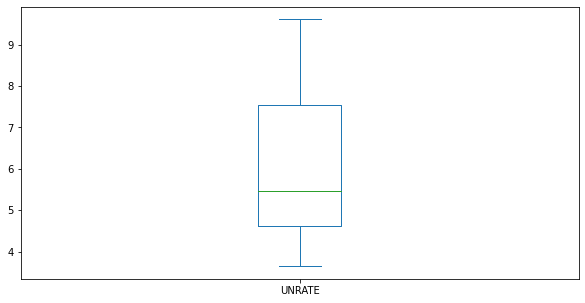

In [65]:
plt.figure(figsize=(10, 5))
data['UNRATE'].plot.box()

<AxesSubplot:>

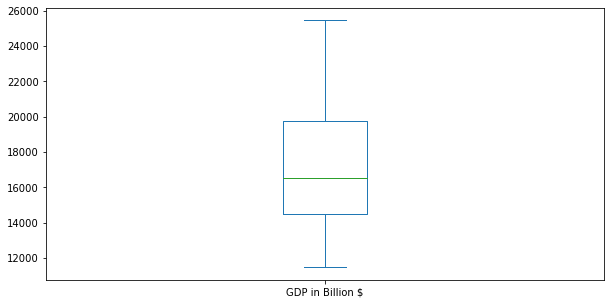

In [66]:
plt.figure(figsize=(10, 5))
data['GDP in Billion $'].plot.box()

<AxesSubplot:>

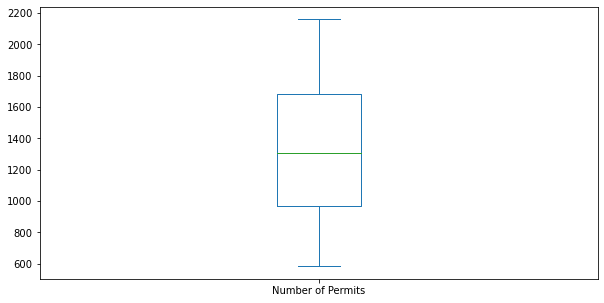

In [67]:
plt.figure(figsize=(10, 5))
data['Number of Permits'].plot.box()

<AxesSubplot:>

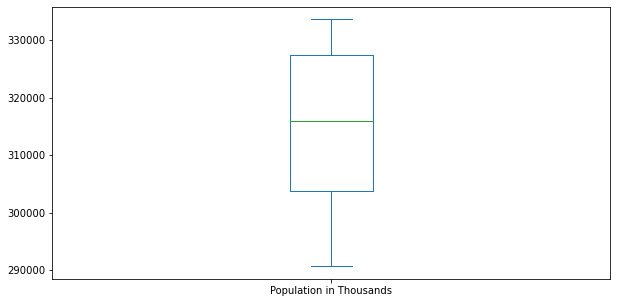

In [68]:
plt.figure(figsize=(10, 5))
data['Population in Thousands'].plot.box()

<AxesSubplot:>

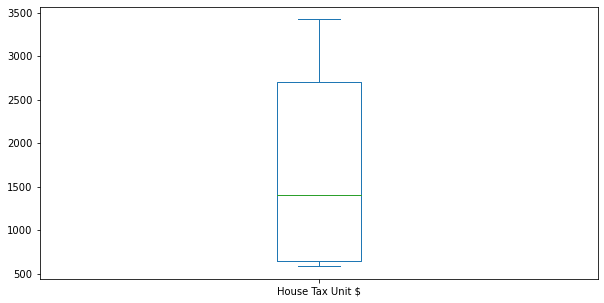

In [69]:
plt.figure(figsize=(10, 5))
data['House Tax Unit $'].plot.box()

<AxesSubplot:>

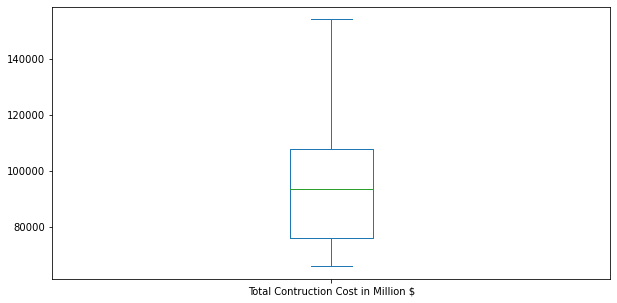

In [70]:
plt.figure(figsize=(10, 5))
data['Total Contruction Cost in Million $'].plot.box()

<AxesSubplot:>

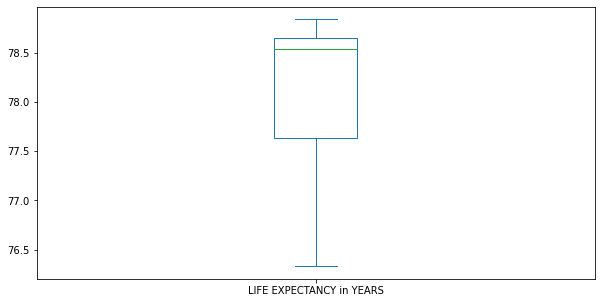

In [71]:
plt.figure(figsize=(10, 5))
data['LIFE EXPECTANCY in YEARS'].plot.box()

<AxesSubplot:>

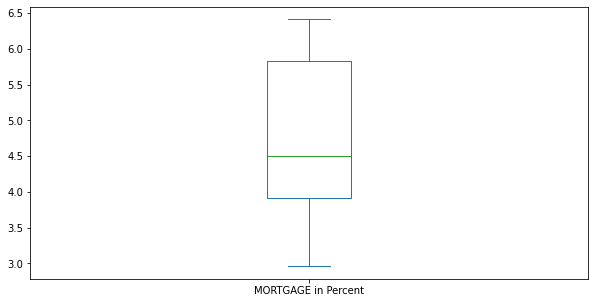

In [72]:
plt.figure(figsize=(10, 5))
data['MORTGAGE in Percent'].plot.box()

<AxesSubplot:>

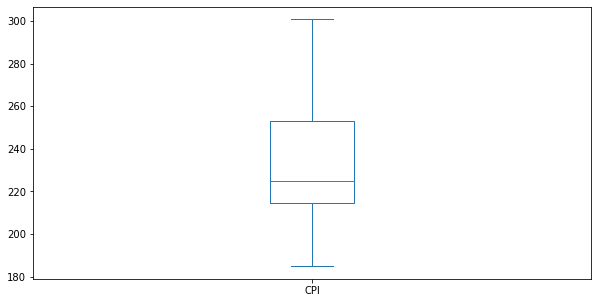

In [73]:
plt.figure(figsize=(10, 5))
data['CPI'].plot.box()

<AxesSubplot:>

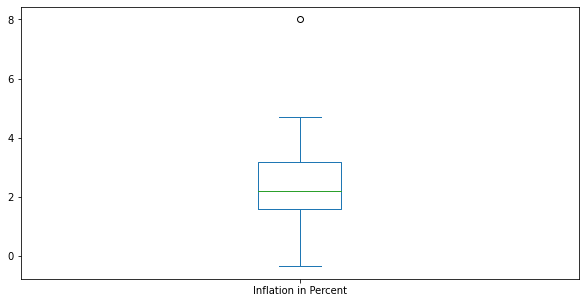

In [74]:
plt.figure(figsize=(10, 5))
data['Inflation in Percent'].plot.box()

Inflation has some outlier, let's remove them using IQR Method.

In [85]:
q1 = data["Inflation in Percent"].quantile(0.25)
q3 = data["Inflation in Percent"].quantile(0.75)
iqr = q3 - q1
ul=q3+1.5*iqr
ll=q1-1.5*iqr
data["Inflation in Percent"]=data["Inflation in Percent"][~((data["Inflation in Percent"]>ul)|(data["Inflation in Percent"]<ll))]

Filling the NaN value with median which was removed in IQR

In [86]:
data=data.fillna(data["Inflation in Percent"].median())

<AxesSubplot:>

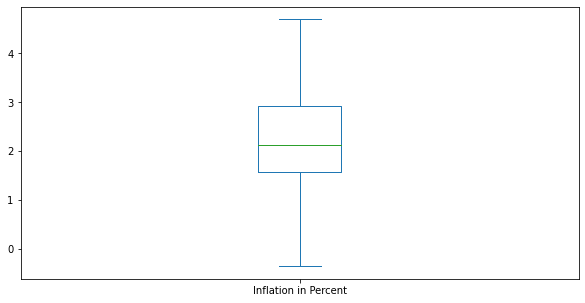

In [88]:
plt.figure(figsize=(10, 5))
data['Inflation in Percent'].plot.box()

# Univaritae Analysis

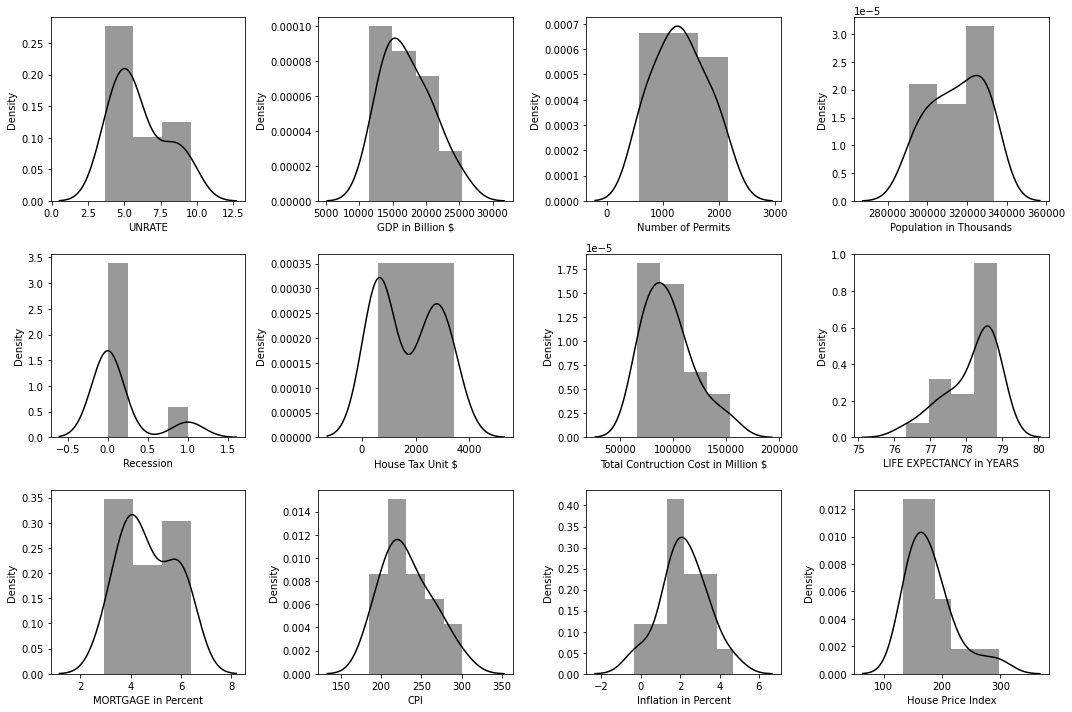

In [89]:
nrows = 3
ncols = 4
repeater = 1
plt.figure(figsize=(15, 10))

for i in data.columns:
    plt.subplot(nrows, ncols, repeater)
    sns.distplot(data.loc[:, i],color='k')
    repeater = repeater+1
    
plt.tight_layout()
plt.show()

<b>Inferences</b>

Data is mostly normal, House Tax shows bimodal data

# Bivariate Analysis

<b>Target vs Numeric Variables Scatterplot</b>

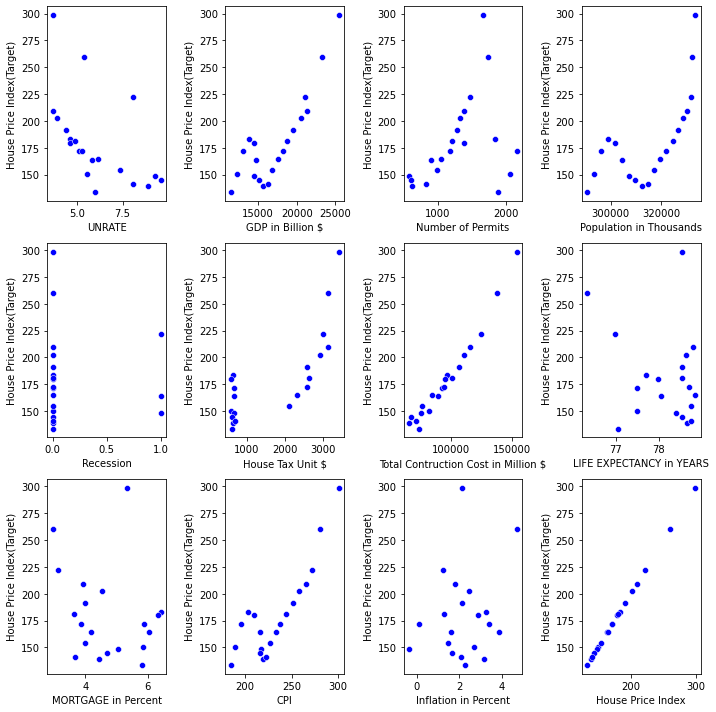

In [90]:
nrows = 3
ncols = 4
repeater = 1
plt.figure(figsize=(10, 10))
#plt.xticks(years,rotation=70,fontsize=50)

for i in data.columns:
    plt.subplot(nrows, ncols, repeater)
    sns.scatterplot(x=data.loc[:, i],y=data["House Price Index"],color='blue')
    plt.xlabel(str(i))
    plt.ylabel("House Price Index(Target)")
    repeater = repeater+1
    
plt.tight_layout()
plt.show()

# Correlation Matrix

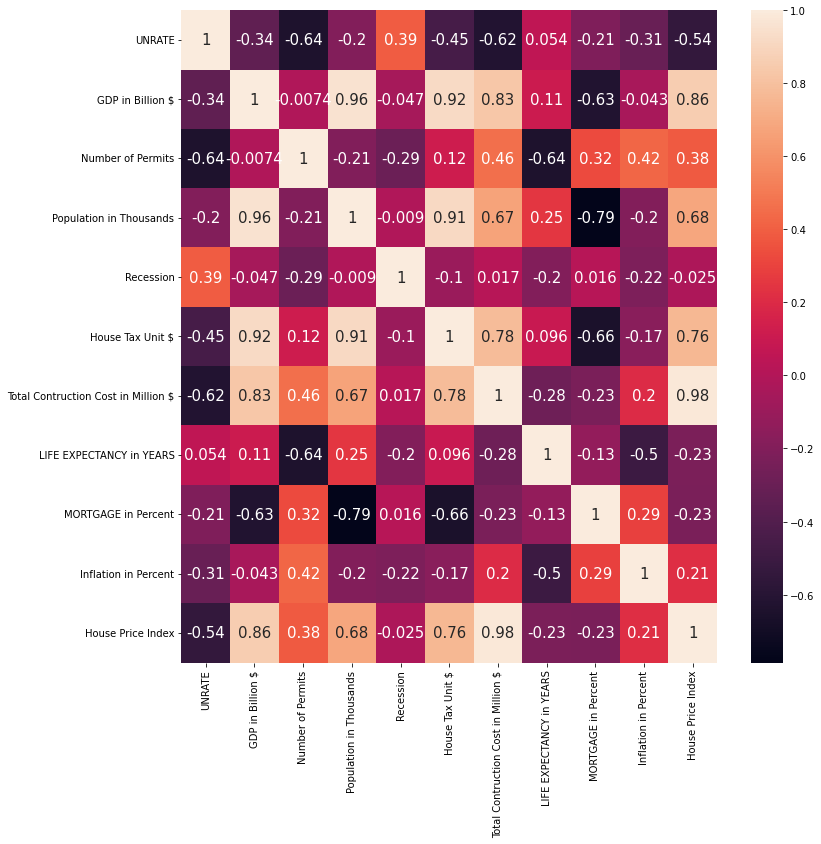

In [91]:
plt.subplots(figsize=(12,12))
sns.heatmap(data.drop("CPI",axis=1).corr(),annot=True,annot_kws={'size':15})
plt.show()

# Multicollinearity Check

In [92]:
vif_data=pd.DataFrame()
vif_data['Features']=data.columns

In [93]:
vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                          for i in range(len(data.columns))]

In [94]:
vif_data.sort_values("VIF",ascending=False)

,Features,VIF
9,CPI,192426.038460
3,Population in Thousands,174991.738215
7,LIFE EXPECTANCY in YEARS,150112.854064
1,GDP in Billion $,70188.533481
6,Total Contruction Cost in Million $,26808.008318
11,House Price Index,16131.558019
0,UNRATE,1133.165761
8,MORTGAGE in Percent,958.517866
2,Number of Permits,369.353091
5,House Tax Unit $,221.251298


<b>CPI shows high multicollinearity</b>

# Train-Test Split

In [96]:
Target=data["House Price Index"]
X=data.drop("House Price Index",axis=1)

In [107]:
num_cols=['UNRATE', 'GDP in Billion $', 'Number of Permits',
       'Population in Thousands', 'House Tax Unit $ ',
       'Total Contruction Cost in Million $', 'LIFE EXPECTANCY in YEARS',
       'MORTGAGE in Percent', 'CPI', 'Inflation in Percent']

In [108]:
X_train,X_test,y_train,y_test=train_test_split(X,Target,test_size=0.3)

# Standard Scaling

<b>Base Model (inear Regression using OLS) Full Model</b>

In [110]:
X_c=sm.add_constant(X_train)

In [111]:
base_model=sm.OLS(y_train,X_c).fit()

In [112]:
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      House Price Index   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     3927.
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           0.000255
Time:                        21:01:04   Log-Likelihood:                -3.4990
No. Observations:                  14   AIC:                             31.00
Df Residuals:                       2   BIC:                             38.67
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                -870.2322    302.244     -2.879      0.102   -2170.682     430.217
UNRATE                                 11.2273      1.587      7.075      0.019       4.400      18.055
GDP in Billion $                       -0.0084      0.010     -0.881      0.471      -0.050       0.033
Number of Permits                       0.0055      0.005      1.118      0.380      -0.016       0.027
Population in Thousands                -0.0009      0.000     -2.796      0.108      -0.002       0.000
Recession                              -7.3498      3.457     -2.126      0.167     -22.225       7.525
House Tax Unit $                        0.0175      0.005      3.368      0.078      -0.005       0.040
Total Contruction Cost in Million $     0.0022      0.000     13.052      0.006       0.001       0.003
LIFE EXPECTANCY in YEARS               11.8736      2.888      4.111      0.054      -0.554      24.301
MORTGAGE in Percent                     2.6374      1.767      1.493      0.274      -4.965      10.239
CPI                                     0.9317      1.021      0.913      0.458      -3.459       5.323
Inflation in Percent                    5.8250      1.819      3.201      0.085      -2.004      13.654
==============================================================================
Omnibus:                        1.621   Durbin-Watson:                   1.671
Prob(Omnibus):                  0.445   Jarque-Bera (JB):                0.400
Skew:                           0.387   Prob(JB):                        0.819
Kurtosis:                       3.295   Cond. No.                     4.53e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.53e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Feature Selection

In [113]:
sbs = sfs(LinearRegression(),
         k_features=11,
         forward=False,
         floating=False,
         cv=0)
sbs.fit(X_train, y_train)
sbs.k_feature_names_

('UNRATE',
 'GDP in Billion $',
 'Number of Permits',
 'Population in Thousands',
 'Recession',
 'House Tax Unit $',
 'Total Contruction Cost in Million $',
 'LIFE EXPECTANCY in YEARS',
 'MORTGAGE in Percent',
 'CPI',
 'Inflation in Percent')

In [114]:
def mod(model,X_train,X_test,y_train,y_test):
    mod_=model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    mse=mean_squared_error(y_test,y_pred)
    print("MSE:",mse)
    print("RMSE:",np.sqrt(mse))

# Model Building using Selected Featured

In [115]:
X_train_=X_train.loc[:,sbs.k_feature_names_]

In [116]:
X_test_=X_test.loc[:,sbs.k_feature_names_]

# XGBoost Regressor with default parameters

In [117]:
mod(XGBRegressor(n_estimators=250),X_train_,X_test_,y_train,y_test)

MSE: 403.40518942635157
RMSE: 20.084949325959265


# GradientBoost Regressor with default parameters

In [118]:
mod(GradientBoostingRegressor(),X_train_,X_test_,y_train,y_test)

MSE: 125.45815677926369
RMSE: 11.200810541173514


# AdaBoost Regressor with deafult parameters

In [119]:
mod(AdaBoostRegressor(),X_train_,X_test_,y_train,y_test)

MSE: 319.2860202182092
RMSE: 17.868576334398025


# Random Forest Regressor with default parameters

In [120]:
mod(RandomForestRegressor(),X_train_,X_test_,y_train,y_test)

MSE: 77.59182052438491
RMSE: 8.808621942414428


# Decision Tree Regressor with default parameters

In [121]:
mod(DecisionTreeRegressor(),X_train_,X_test_,y_train,y_test)

MSE: 371.12456536908576
RMSE: 19.26459356874901


# KNeighbors Regressor using default parameters

In [122]:
mod(KNeighborsRegressor(),X_train_,X_test_,y_train,y_test)

MSE: 259.5995178750774
RMSE: 16.112092287318784


# CatBoost Regressor with default parameters

In [123]:
mod(CatBoostRegressor(),X_train_,X_test_,y_train,y_test)

Learning rate set to 0.020858
0:	learn: 45.3979638	total: 142ms	remaining: 2m 22s
1:	learn: 45.1197092	total: 143ms	remaining: 1m 11s
2:	learn: 44.8420733	total: 144ms	remaining: 48s
3:	learn: 44.5748774	total: 145ms	remaining: 36.2s
4:	learn: 44.2994965	total: 147ms	remaining: 29.2s
5:	learn: 43.9733582	total: 148ms	remaining: 24.5s
6:	learn: 43.7378962	total: 149ms	remaining: 21.2s
7:	learn: 43.3950855	total: 150ms	remaining: 18.6s
8:	learn: 43.0436962	total: 152ms	remaining: 16.7s
9:	learn: 42.7897768	total: 153ms	remaining: 15.1s
10:	learn: 42.5337527	total: 154ms	remaining: 13.8s
11:	learn: 42.2381409	total: 155ms	remaining: 12.8s
12:	learn: 41.9040964	total: 156ms	remaining: 11.8s
13:	learn: 41.6795166	total: 158ms	remaining: 11.1s
14:	learn: 41.4206722	total: 159ms	remaining: 10.5s
15:	learn: 41.1054202	total: 161ms	remaining: 9.91s
16:	learn: 40.8145709	total: 162ms	remaining: 9.38s
17:	learn: 40.4974993	total: 164ms	remaining: 8.93s
18:	learn: 40.2568938	total: 165ms	remaining

# SO RandomForest gives best results with lowest RMSE

In [126]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestRegressor(), X_train, y_train, cv=5, scoring='r2')
print("Cross-validated scores:", scores )
print("Average score:" , np.average(scores))

Cross-validated scores: [0.45284516 0.44526559 0.93273305 0.87858624 0.97307953]
Average score: 0.736501913153037


In [127]:
RandomForestRegressor()

RandomForestRegressor()

In [128]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth':[None,4,6,9]
}

In [129]:
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, scoring='r2')

In [130]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 6, 9],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='r2')

In [131]:
grid_search.best_params_

{'max_depth': 4, 'n_estimators': 50}

In [132]:
mod(RandomForestRegressor(max_depth=9,n_estimators=200),X_train_,X_test_,y_train,y_test)

MSE: 124.50293429695348
RMSE: 11.158088290426523


<b>Final model(Random Forest)</b>

<b>RMSE: 8.8086</b>

<b>Model Interpretation</b>

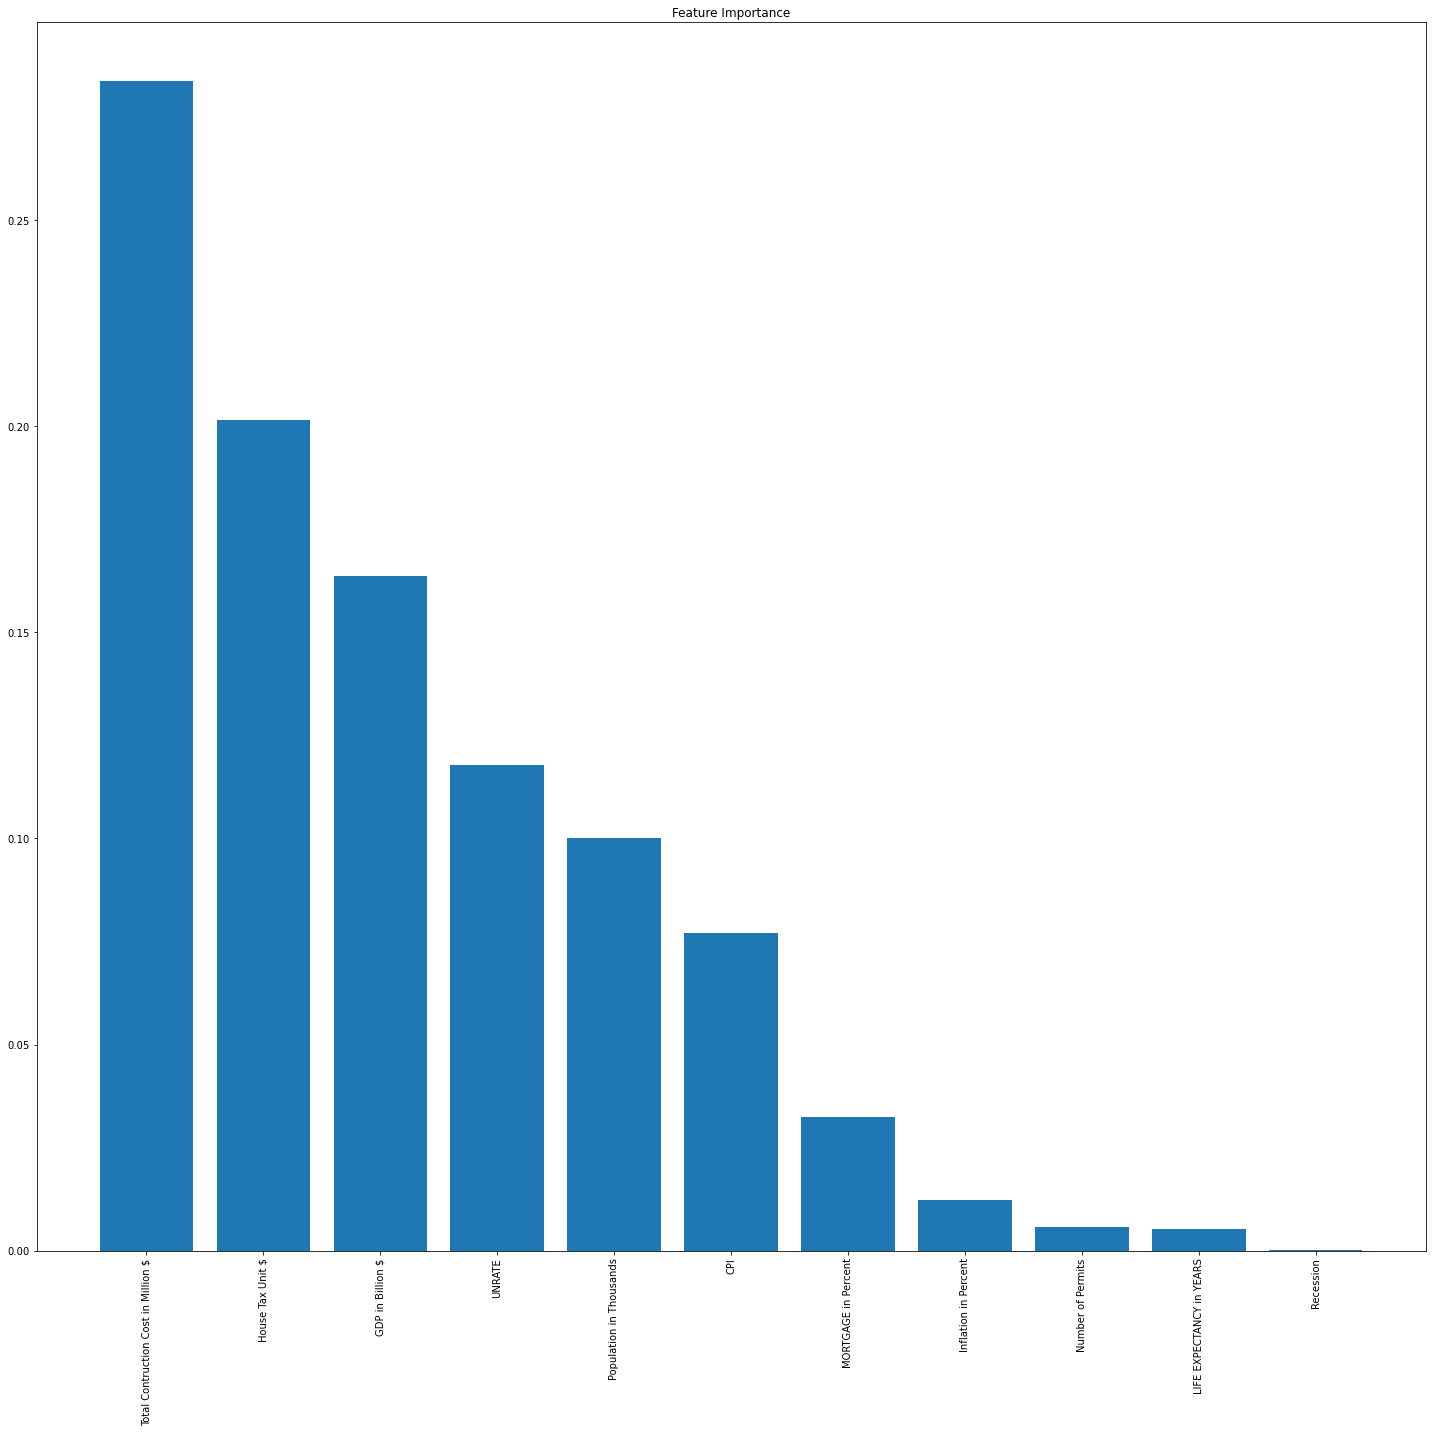

In [133]:
model = RandomForestRegressor()

model.fit(X_train_, y_train)
importances = model.feature_importances_

#
sorted_indices = np.argsort(importances)[::-1]

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train_.shape[1]), X_train_.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

**Construction cost ,Unemployment Rate,CPI affects the House Price Index and buying patterns the most**  
**Recession, Life Expectancy and Permits have not affected much**